In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import fetch_20newsgroups
cats = ['alt.atheism', 'sci.space', 'comp.graphics']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)

In [6]:
print(newsgroups_train.filenames.shape)
print(newsgroups_train.target)

(1657,)
[2 1 0 ... 2 2 2]


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# docs = ['I love programming', 'Programming is fun', 'I love programming and fun']
# vec = CountVectorizer()
# # X = vec.fit_transform(docs)
# print(vec.get_feature_names_out())
# print(X.toarray())

['and' 'fun' 'is' 'love' 'programming']
[[0 0 0 1 1]
 [0 1 1 0 1]
 [1 1 0 1 1]]


In [45]:
df = pd.read_csv('newsgroups_train.csv')
print(df.head())

                                                text  target       category
0  From: degroff@netcom.com (21012d)\nSubject: Re...       2      sci.space
1  From: ab@nova.cc.purdue.edu (Allen B)\nSubject...       1  comp.graphics
2  From: healta@saturn.wwc.edu (Tammy R Healy)\nS...       0    alt.atheism
3  From: capelli@vnet.IBM.COM (Ron Capelli)\nSubj...       1  comp.graphics
4  From: henry@zoo.toronto.edu (Henry Spencer)\nS...       2      sci.space


In [46]:
data=df['text']
print(data)

0       From: degroff@netcom.com (21012d)\nSubject: Re...
1       From: ab@nova.cc.purdue.edu (Allen B)\nSubject...
2       From: healta@saturn.wwc.edu (Tammy R Healy)\nS...
3       From: capelli@vnet.IBM.COM (Ron Capelli)\nSubj...
4       From: henry@zoo.toronto.edu (Henry Spencer)\nS...
                              ...                        
1652    From: ab@nova.cc.purdue.edu (Allen B)\nSubject...
1653    From: renes@ecpdsharmony.cern.ch (Rene S. Dutc...
1654    From: xrcjd@resolve.gsfc.nasa.gov (Charles J. ...
1655    From: dietz@cs.rochester.edu (Paul Dietz)\nSub...
1656    From: jhwitten@cs.ruu.nl (Jurriaan Wittenberg)...
Name: text, Length: 1657, dtype: object


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(data.fillna(''))
print(vec.get_feature_names_out())
print(X.toarray())

['00' '000' '0000' ... 'zyklon' 'zyxel' 'ªl']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
x=X.toarray()
y=df['target']

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1242, 29663), (415, 29663), (1242,), (415,))

In [51]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [53]:
y_pred = model.predict(x_test)
print(y_pred)

[0 1 1 0 2 0 1 2 1 1 1 2 0 0 0 1 0 2 0 2 1 1 2 2 1 2 2 0 0 2 2 0 1 2 2 1 2
 0 2 2 1 2 0 1 1 1 1 2 2 1 2 1 1 1 1 0 2 0 2 2 2 2 2 1 2 1 1 1 1 0 1 0 2 1
 0 2 2 2 0 0 2 2 2 1 1 1 1 1 1 2 1 2 2 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 2 2
 0 0 1 0 0 1 1 0 2 1 1 0 0 1 0 0 1 2 0 2 1 0 1 0 1 0 2 1 0 1 1 1 0 0 0 2 1
 1 2 1 1 2 1 1 1 2 2 1 1 1 1 2 0 0 0 2 2 2 1 0 2 2 1 2 1 0 1 2 2 0 2 2 1 1
 1 0 0 2 2 2 1 1 0 0 0 1 0 0 2 0 1 1 2 0 2 0 0 0 0 0 1 0 1 2 1 2 0 2 1 1 0
 1 0 0 0 2 2 1 2 0 2 0 1 1 2 1 0 1 2 0 0 1 0 2 2 1 1 1 0 2 1 2 1 0 2 2 1 2
 1 2 1 1 0 1 2 0 0 0 2 1 0 0 0 0 2 0 2 2 1 2 2 2 1 2 0 1 2 2 0 1 1 1 1 0 2
 2 2 2 2 0 1 0 2 1 0 1 2 0 0 1 1 1 1 2 1 2 1 2 2 1 2 2 0 2 0 1 2 2 1 0 2 2
 0 2 2 2 0 0 2 2 2 2 2 0 1 2 0 1 2 2 0 1 2 2 0 0 1 1 1 1 2 0 1 2 2 0 1 2 0
 0 1 0 1 2 0 1 0 0 0 2 1 1 1 1 2 2 0 2 1 2 0 1 1 2 2 1 0 0 1 0 2 0 2 2 1 0
 1 0 1 1 0 2 1 1]


In [54]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(dft)

      Actual  Predicted
1464       0          0
413        1          1
838        1          1
490        0          0
1155       2          2
...      ...        ...
1535       1          1
1268       0          0
629        2          2
990        1          1
1107       1          1

[415 rows x 2 columns]


In [55]:
# accuracy test
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.983132530120482

In [56]:
df = pd.read_csv('newsgroups_test.csv')
print(df.head())

                                                text  target       category
0  From: mccall@mksol.dseg.ti.com (fred j mccall ...       2      sci.space
1  From: "Changyaw Wang" <wangc@cs.indiana.edu>\n...       1  comp.graphics
2  From: lioness@maple.circa.ufl.edu\nSubject: Te...       1  comp.graphics
3  From: hotopp@ami1.bwi.wec.com (Daniel T. Hotop...       1  comp.graphics
4  From: Ad-Robot@bobsbox.rent.com (Robotic Posti...       1  comp.graphics


In [58]:
test_target = df['target']

In [59]:
test_pred = model.predict(vec.transform(df['text'].fillna('')))
print(accuracy_score(test_target, test_pred))

0.9555353901996371


In [62]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_target, test_pred)

array([[312,   3,   4],
       [  8, 370,  11],
       [ 11,  12, 371]])

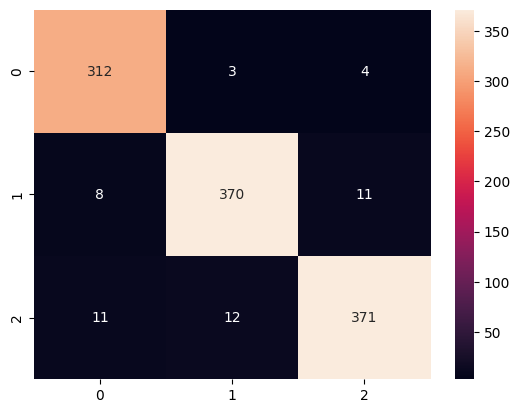

In [63]:
# plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(test_target, test_pred), annot=True, fmt='d')
plt.show()